In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


from sklearn.datasets import make_blobs
from numpy import unique
from numpy import where

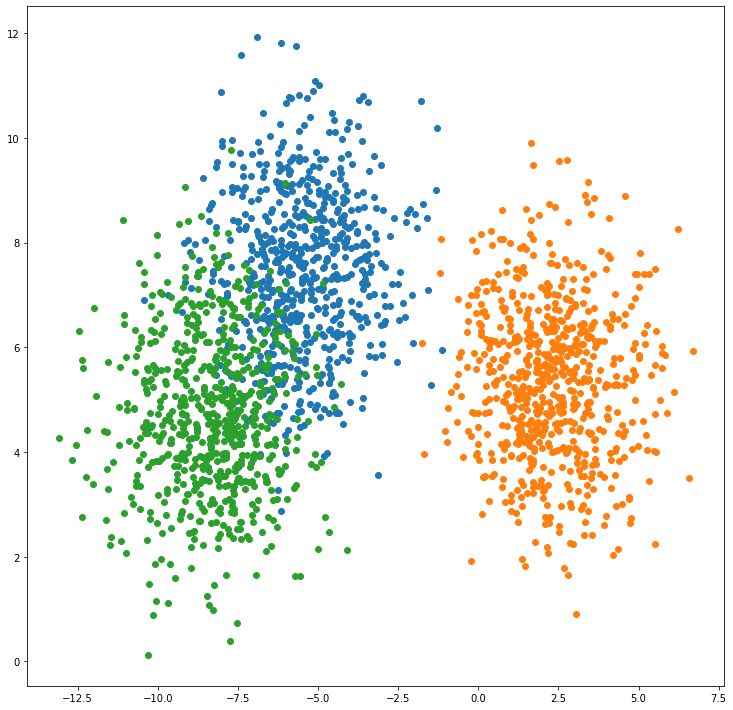

In [13]:
fig= plt.figure(figsize=(12.5,12.5))

X, y = make_blobs(n_samples=2000, centers=3, n_features=5,cluster_std=1.5, random_state=5)

# X = features
# y = valor real do cluster array([0, 1, 2])

# create scatter plot for samples from each class

# Criando o gráfico em 3 etapas: Primeiro todos de classe 0 -> 1 -> 2 

for class_value in range(3):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1]) #ploto as duas primeiras features
    
# show the plot
plt.show()
    

# Clusterização baseada em centroids


### K-Means Clustering

É um método de clusterização baseado em centróides (K-means), em que cada elemento do cluster tem como base a sua distância média de um dos centros determinados no momento de instanciar o modelo. Por exemplo n_clusters=2. Este número k, definido de antemão, será calculado por uma série de tentativas aleatórias o que minimiza a distância entre pontos no conjunto de dados e cada centro de cluster. O problema é conhecido como NP-hard e, portanto, as soluções são comumente aproximadas ao longo de uma série de tentativas. Porém o output do K-means será sempre catogórico: pertence a determinado cluster ou não sem a possibilidade de ambiguidades ou probabilidades.

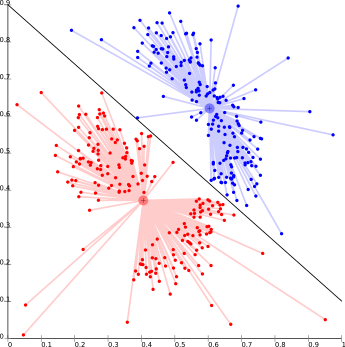!

A maior desvantagem dos algoritmos do tipo k-means é que eles exigem que o número de clusters k seja especificado com antecedência. Isso causa problemas para dados de clustering quando o número de clusters não pode ser conhecido de antemão. K-means também tem problemas para agrupar distribuições baseadas em densidade, como aquelas na imagem abaixo ou aquelas que não são lineares separáveis.

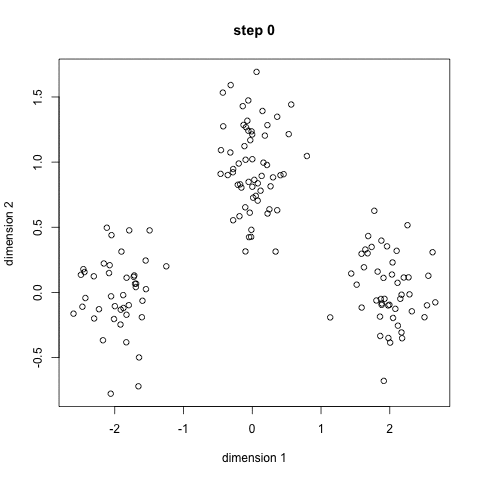

### Passo a passo do algoritmo:
 - Selecione a quantidade de classes que o algoritmo deve buscar, ele inicializa aleatoriamente os centroides. O algoritmo reinicia a busca randômica por centroides a cada round. Os pontos centrais, denotados como X no gráfico, são vetores com o mesmo comprimento de cada vetor de ponto de dados.
 - O K-means classifica cada data point calculando a distância entre os pontos específicos e o centro de cada grupo. O próximo passo é classificar os pontos que pertencem ao grupo cujo centro é o mais próximo deles.
 - Com base nessas informações, tire a média de todos os vetores no grupo específico e recalcule o centro do grupo.
 - Repita o procedimento por um número de vezes e certifique-se de que os centros do grupo não variem muito entre as iterações.


#### Prós
- K-means é um método rápido porque não realiza muitos cálculos.
- Não realiza predições ambíguas.

#### Contras
- Identificar e classificar os grupos pode ser um aspecto desafiador.
- Como começa com uma escolha aleatória de centros de cluster, os resultados podem ser inconsistentes.

In [2]:
from sklearn.cluster import KMeans

In [25]:
model = KMeans(n_clusters=3)

model.fit(X) # Aqui o modelo esta aprendendo com o X, criando os grupos !

KMeans(n_clusters=3)

In [30]:
y_pred = model.predict(X) # Baseado nos valores de X e o request de 3 ele classificou o y_pred em
                          # três possíveis grupos
    
unique(y_pred)

array([0, 1, 2])

0
1
2


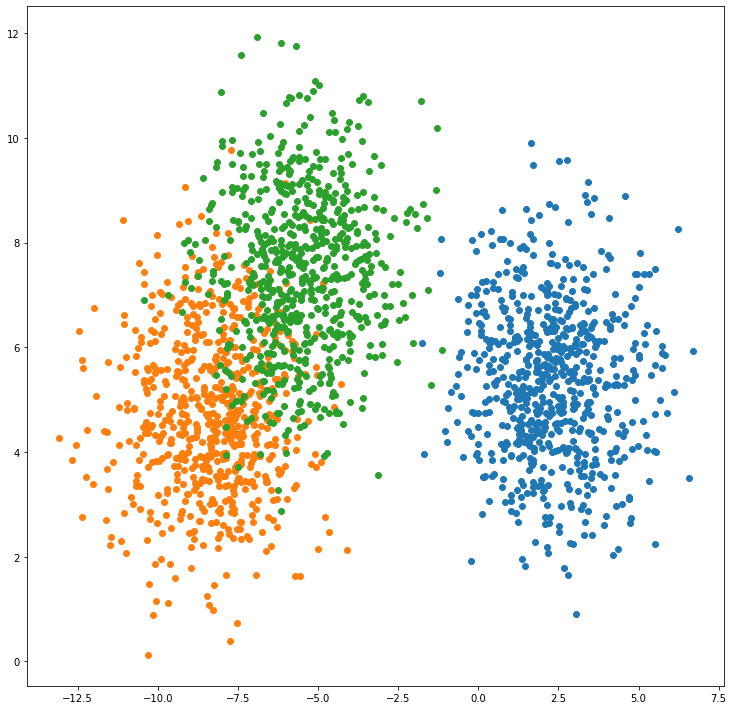

In [59]:
fig= plt.figure(figsize=(12.5,12.5))

for cluster in range(3): # ou seja 0,1,2
    
    #print(cluster) 
    
    row_ix = where(y_pred==cluster) # retorna uma lista com as colunas onde y_pred == cluster 
    
    plt.scatter(X[row_ix, 0], X[row_ix, 1]) # pinta dentro de X as linhas vindo do row_ix para 
                                            # coluna 0 e 1


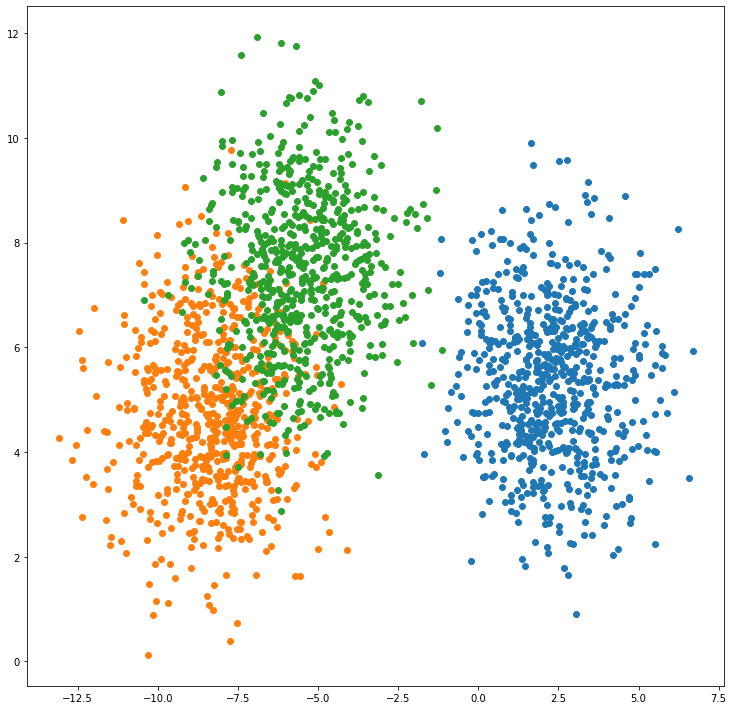

In [16]:
fig= plt.figure(figsize=(12.5,12.5))


# define the model
model = KMeans(n_clusters=3) # Escolha de 3 clusters

# fit the model
model.fit(X)

# assign a cluster to each example
# dado valor de x que grupo é Y 

yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat) # quantos clusters foram previstos

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

# Clusterização baseada em densidade

## DBSCAN — Density-Based Spatial Clustering of Applications with Noise

O DBSCAN, um algoritmo de agrupamento baseado em densidade, é uma melhoria em relação ao agrupamento Mean-Shift, pois tem vantagens específicas. O gráfico a seguir pode esclarecer o assunto para você.

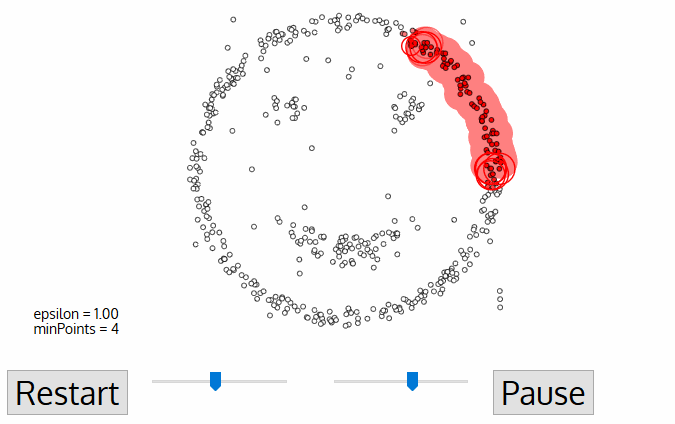

- Ele começa com um ponto de dados inicial aleatório não visitado. A partir daí, todos os pontos dentro de uma distância ‘Epsilon — Ɛ, são classificados como neighborhood points.

- É preciso um número mínimo de pontos na vizinhança para iniciar o processo de clustering. Quando atingidas essas circuntâncias, o data point atual torna-se o primeiro ponto no cluster. Caso contrário, o ponto será rotulado como ‘Ruído’. Em qualquer caso, o ponto atual se torna um ponto visitado.

- Todos os pontos dentro da distância Ɛ tornam-se parte do mesmo cluster. Repita o procedimento para todos os novos pontos adicionados ao grupo de cluster.

- Continue com o processo até visitar e rotular cada ponto dentro da vizinhança Ɛ do cluster.

- Após a conclusão do processo, comece novamente com um novo ponto não visitado, levando assim à descoberta de mais clusters ou de ruído. No final do processo, certifique-se de marcar cada ponto como cluster ou ruído.

In [65]:
from sklearn.cluster import DBSCAN

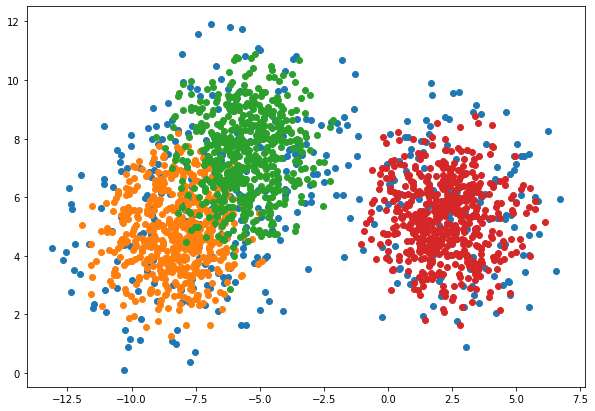

In [62]:
fig= plt.figure(figsize=(10,7))

model = DBSCAN(eps=1.8, min_samples=10)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
    
# show the plot
plt.show()

from documentation : Cluster labels. Noisy samples are given the label -1

Os Pontos Azuis apontam ruídos!

# Clusterização baseada em distribuição

## Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)

Uma das principais desvantagens do K-Means é seu uso ingênuo ou simplista do K-Means para determinar o centro do cluster. Observando a imagem abaixo, podemos ver porque usar o K-Means não é a melhor maneira de fazer esta escolha. No lado esquerdo, parece bastante óbvio visualmente que existem dois clusters circulares com raios diferentes centrados na mesma média. O K-Means não pode lidar com isso porque os valores médios dos clusters estão muito próximos. Sem falar que o K-Means também falha nos casos em que os clusters não são circulares, novamente porque usa como resultado do a média como centro do cluster.


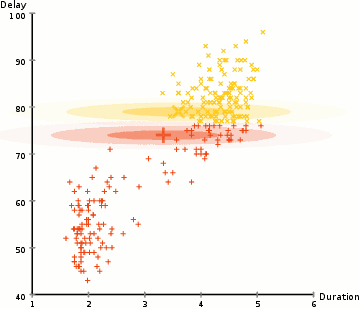


Modelos de Mistura Gaussiana (GMMs) nos dão mais flexibilidade do que K-Means. Com GMMs, assumimos que os pontos de dados têm distribuição Gaussiana; esta é uma suposição menos restritiva do que dizer que eles são circulares usando a média. Dessa forma, temos dois parâmetros para descrever a forma dos clusters: a média e o desvio padrão! Tomando um exemplo em duas dimensões, isso significa que os clusters podem assumir qualquer tipo de forma elíptica (uma vez que temos um desvio padrão nas direções x e y). Assim, cada distribuição gaussiana é atribuída a um único cluster.

Para encontrar os parâmetros do Gaussiano para cada cluster (por exemplo, a média e o desvio padrão), usaremos um algoritmo de otimização chamado Expectation — Maximization (EM). Dê uma olhada no gráfico abaixo como uma ilustração das gaussianas sendo ajustadas aos clusters. Em seguida, podemos prosseguir com o processo de agrupamento de Expectativa-Maximização usando GMMs.

- Semelhante ao cluster K-means, selecionamos o número de clusters e inicializamos aleatoriamente os parâmetros de distribuição gaussiana para cada um deles.
- Com esse background, calcule a probabilidade de cada ponto de dados pertencer a um determinado cluster. Quanto mais próximo o ponto estiver do centro da Gauss, maiores são as chances de ele pertencer ao cluster.
- Com base nesses cálculos, determinamos um novo conjunto de parâmetros para as distribuições gaussianas para maximizar as probabilidades de pontos de dados dentro dos clusters. Usamos uma soma ponderada das posições dos pontos de dados para calcular essas probabilidades. A probabilidade de o ponto de dados pertencer a um determinado cluster é o fator de peso
- Repita os passos 2 e 3 até a convergência onde não há muita variação.


### Pros:

Há um maior nível de flexibilidade em relação à covariância de cluster nos GMMs em comparação com o agrupamento de K-médias por causa do conceito de desvio padrão.
Como esse conceito usa probabilidade, você tem vários clusters por data points. Portanto, se um determinado data point pertence a dois clusters sobrepostos, podemos defini-lo de forma ainda mais precisa dizendo que pertence A% à Classe 1 e B% à Classe 2.

In [67]:
from sklearn.mixture import GaussianMixture

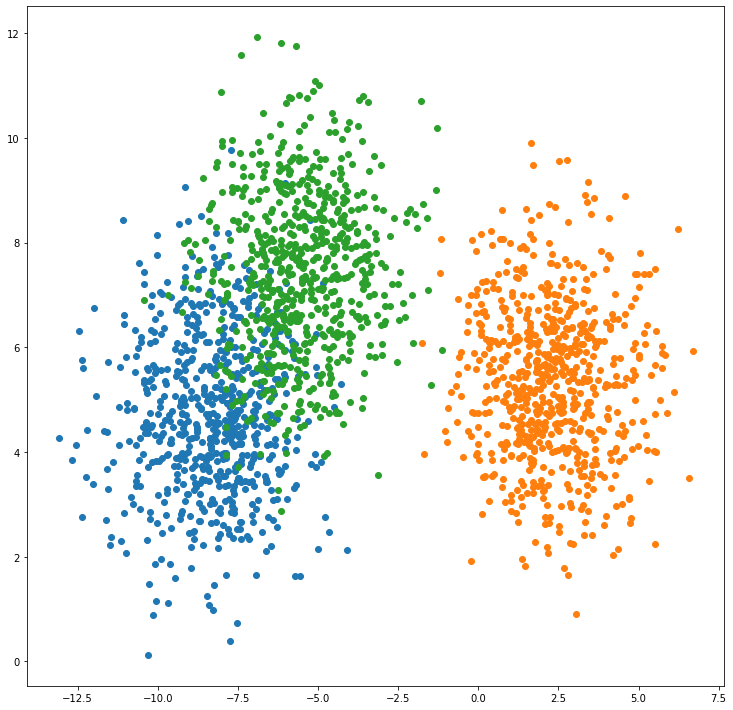

In [70]:
fig= plt.figure(figsize=(12.5,12.5))

# define the model
model = GaussianMixture(n_components=3)

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show the plot
plt.show()

# Clusterização por conectividade

## Agglomerative Hierarchical Clustering

Os algoritmos de Hierarchical Clustering ou agrupamento hierárquico se enquadram em 2 categorias: top-down ou bottom-up. Algoritmos bottom-up ou ascendentes tratam cada ponto de dados como um único cluster no início e então mesclam (ou aglomeram) pares de clusters sucessivamente até que todos os clusters tenham sido mesclados em um único cluster que contém todos os pontos de dados. O agrupamento hierárquico bottom-up é, portanto, denominado agrupamento aglomerativo hierárquico ou HAC. Esta hierarquia de clusters é representada como uma árvore (ou dendrograma). A raiz da árvore é o único cluster que reúne todas as amostras, sendo as folhas os aglomerados com apenas uma amostra. Confira o gráfico abaixo para ver uma ilustração antes de passar para as etapas do algoritmo

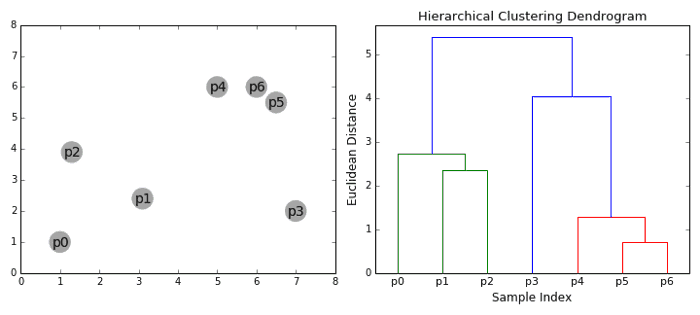

#### Funcionamento do Agglomerative Hierarchical Clustering:

- Começamos tratando cada ponto de dados como um único cluster, ou seja, se houver X pontos de dados em nosso conjunto de dados, teremos X clusters. Em seguida, selecionamos uma métrica de distância que mede a distância entre dois clusters. Como exemplo, usaremos o average linkage, que define a distância entre dois clusters como a distância média entre os pontos de dados no primeiro cluster e os pontos de dados no segundo cluster.

- Em cada iteração, combinamos dois clusters em um. Os dois clusters a serem combinados são selecionados como aqueles com a menor ligação média. Ou seja, de acordo com nossa métrica de distância selecionada, esses dois clusters têm a menor distância entre si e, portanto, são os mais semelhantes e devem ser combinados.

- A etapa 2 é repetida até chegarmos à raiz da árvore, ou seja, temos apenas um cluster que contém todos os data points. Desta forma, podemos selecionar quantos clusters queremos no final, simplesmente escolhendo quando parar de combinar os clusters, ou seja, quando pararmos de construir a árvore!

O clustering hierárquico não exige que especifiquemos o número de clusters e podemos até selecionar qual número de clusters parece melhor, já que estamos construindo uma árvore. Além disso, o algoritmo não é sensível à escolha da métrica de distância; todos eles tendem a funcionar igualmente bem, enquanto com outros algoritmos de agrupamento, a escolha da métrica de distância é crítica. Um caso de uso particularmente bom de métodos de agrupamento hierárquico é quando os dados subjacentes têm uma estrutura hierárquica e você deseja recuperar a hierarquia; outros algoritmos de agrupamento não podem fazer isso. Essas vantagens do agrupamento hierárquico vêm ao custo de menor eficiência, pois tem uma complexidade de tempo de O (n³), ao contrário da complexidade linear de K-Means e GMM.

In [71]:
from sklearn.cluster import AgglomerativeClustering

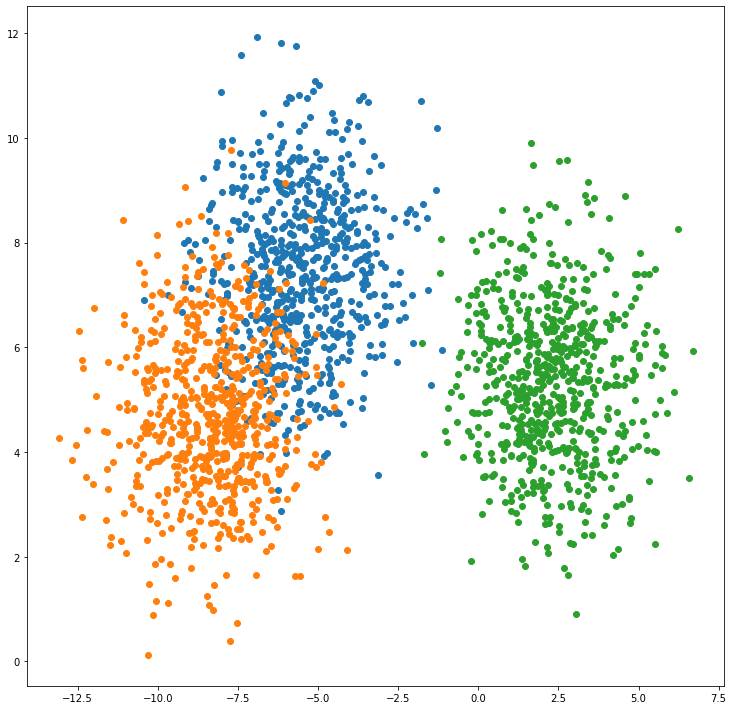

In [72]:
fig= plt.figure(figsize=(12.5,12.5))

model = AgglomerativeClustering(n_clusters=3)

# fit model and predict clusters
yhat = model.fit_predict(X)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

# Exemplos de usos de algoritmos de clustering:

- ### Sistemas de Diagnóstico:
A profissão médica usa o K-Means na criação de sistemas de apoio à decisão médica mais inteligentes, especialmente no tratamento de doenças do fígado.

- ### Motores de Busca:
A clusterização é a espinha dorsal dos motores de busca. Quando uma pesquisa é realizada, os resultados da pesquisa precisam ser agrupados e os mecanismos de pesquisa frequentemente usam clustering para fazer isso.

- ### Redes de sensores sem fio
O algoritmo de clustering desempenha o papel de localizar os cluster heads, que coletam todos os dados em seu respectivo cluster.

- ### Marketing e Vendas
Personalização e targeting em marketing são um grande negócio.
Isso é conseguido examinando as características específicas de uma pessoa e compartilhando com ela as campanhas que tiveram sucesso com outras pessoas semelhantes.

#### Qual é o problema: 

Se sua empresa está tentando obter o melhor retorno sobre seu investimento em marketing, é crucial que você faça o targeting das pessoas de uma maneira correta. Se errar, você corre o risco de não realizar nenhuma venda ou, pior, prejudicar a confiança do cliente na sua empresa.
####  Como os clusters funcionam: 

Os algoritmos de clustering são capazes de agrupar pessoas com características semelhantes e probabilidade de compra. Depois de ter os grupos, você pode executar testes em cada grupo com uma cópia de marketing diferente que o ajudará a direcionar melhor suas mensagens para eles no futuro.

# Implementando 2 dos algoritmos mais comuns:

## K-Means Clustering

In [124]:
from sklearn.cluster import KMeans

In [74]:
df = pd.read_csv('Wholesale customers data.csv')
df.sample(5)

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
37         2       3  15168  10556    12477    1920              6506   
198        1       1  11686   2154     6824    3527               592   
125        1       3  76237   3473     7102   16538               778   
352        1       3    608   1106     1533     830                90   
316        1       2   7127   1375     2201    2679                83   

     Delicassen  
37          714  
198         697  
125         918  
352         195  
316        1059

In [75]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

Aqui, vemos que há muita variação na magnitude dos dados. Variáveis ​​como Channel e Region têm magnitude baixa, enquanto variáveis ​​como Fresh, Milk, Grocery, etc. têm magnitude maior.

Sabemos que o K-Means é um algoritmo baseado em distância. Essas diferenças de magnitude podem criar um problema. Então, é imprescindível primeiro trazer todas as variáveis ​​para a mesma magnitude:

In [76]:
# padronizando os dados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [77]:
# statisticas do dataset padronizado
pd.DataFrame(df_scaled).describe()

0             1             2           3             4  \
count  4.400000e+02  4.400000e+02  4.400000e+02  440.000000  4.400000e+02   
mean   1.614870e-17  3.552714e-16 -3.431598e-17    0.000000 -4.037175e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00    1.001138  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01   -0.778795 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01   -0.578306 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01   -0.294258 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01    0.189092  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00    9.183650  8.936528e+00   

                  5             6             7  
count  4.400000e+02  4.400000e+02  4.400000e+02  
mean   3.633457e-17  2.422305e-17 -8.074349e-18  
std    1.001138e+00  1.001138e+00  1.001138e+00  
min   -6.283430e-01 -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01 -5.511349e-01 -3.964005e-01  
50%   -3.188045e-01 -4.336004e-01 -1.985766e-01  
75%    9.946441e-02  2.184822e-01  1.048598e-01  
max    1.191900e+01  7.967672e+00  1.647845e+01

In [78]:
kmeans = KMeans (n_clusters=2,init ='k-means++')

kmeans.fit(df_scaled)

KMeans(n_clusters=2)

Vamos avaliar o quão bem estão os clusters formados. Para fazer isso, vamos calcular a inércia dos clusters. A inércia é um indicativo de quão estáveis os clusters estão. Ou seja, caso eu promova mais n-iterações, quão diferentes os clusters vão ser entre si a cada nova rodada:

In [79]:
# inertia on the fitted data
kmeans.inertia_

2599.384423783626

Obtivemos um valor de inércia de quase 2600. Isso é bom? Não sabemos! Uma forma de avaliar isto é através do método elbow ou cotovelo. Em datasets com um número de clusters muito claros, o método registra uma queda significativa na inércia, formando um cotovelo no gráfico. Mais ou menos assim:

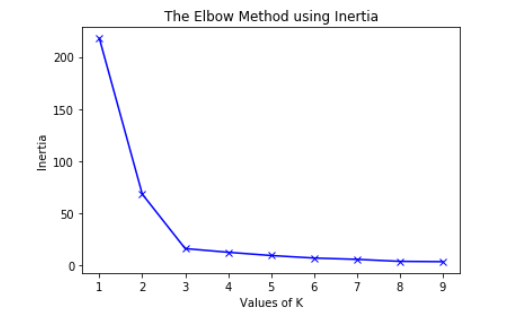

Text(0, 0.5, 'Inertia')

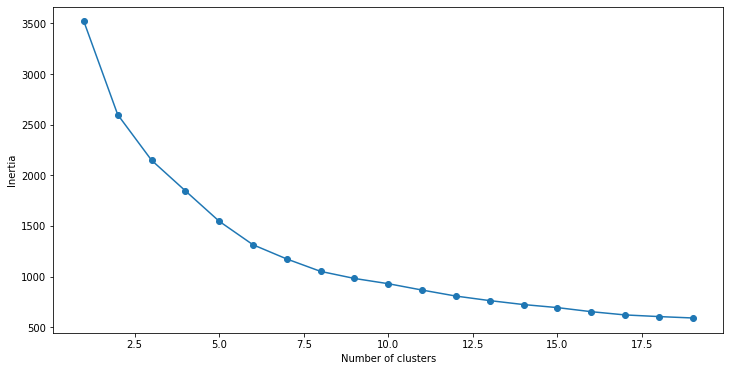

In [81]:
# fittando vários modelos e armazenando a inércia em uma lista

SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
    
# convertendo os resultados em um dataframe e plotando
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Como podemos perceber, nossos dados não formam um cotovelo tão nítido, mas vemos uma mudança de ângulo significativa entre 5 e 8 clusters

Então podemos escolher qualquer número de clusters entre 5 e 8. Vamos definir o número de clusters como 6 e ajustar o modelo:


In [83]:
kmeans = KMeans (n_clusters=6,init ='k-means++')

kmeans.fit(df_scaled)

y_pred = kmeans.predict(df_scaled)

In [84]:
# criamos um novo dataframe com os dados do df original 
# adicionamos a etiqueta dos clusters

df_final = pd.DataFrame(df).copy()
df_final['cluster'] = y_pred
df_final['cluster'].value_counts()

3    172
0    125
5     86
1     46
4     10
2      1
Name: cluster, dtype: int64

## Agora que temos os clusters, o que os diferencia?

Desafio: faça uma EDA e tente justificar as diferenças entre os diversos clusters.

In [85]:
df_final[df_final['cluster']==0]

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
4          2       3  22615   5410     7198    3915              1777   
5          2       3   9413   8259     5126     666              1795   
..       ...     ...    ...    ...      ...     ...               ...   
418        2       3    660   8494    18622     133              6740   
421        2       3  17063   4847     9053    1031              3415   
423        2       3  17565   3686     4657    1059              1803   
424        2       3  16980   2884    12232     874              3213   
437        2       3  14531  15488    30243     437             14841   

     Delicassen  cluster  
0          1338        0  
1          1776        0  
2          7844        0  
4          5185        0  
5          1451        0  
..          ...      ...  
418         776        0  
421        1784        0  
423         668        0  
424         249        0  
437        1867        0  

[125 rows x 9 columns]

## Hierarchical Clustering

Os clusters hierárquicos possuem uma característica peculiar: capturam a variação conjunta de elementos de um dataset e transforma essa covariância em uma relação hierárquica. Entre as diversas aplicações está a capacidade de clusterizar ações que oscilam juntas. Isto pode ser particularmente interessante para ajudar traders e investidores a formarem uma carteira variada.
Para poder ilustrar este exemplo, vamos usar dados de 60 ativos de empresas americanas referente ao período de 2010 a 2015. Primeiro vamos fazer as importações necessárias:

In [88]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

In [90]:
df_stock = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
df_stock.sample(5)

Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  \
2             Amazon   -2.350006    1.260009   -2.350006   -2.009995   
19   GlaxoSmithKline   -0.110001   -0.160000   -0.220001    0.079998   
31         McDonalds    0.149998   -0.360001   -0.750000    0.650002   
59             Yahoo    0.159999    0.010001    0.000000   -0.109998   
3   American express    0.109997    0.000000    0.260002    0.720002   

    2010-01-08  2010-01-11  2010-01-12  2010-01-13  2010-01-14  ...  \
2     2.960006   -2.309997   -1.640007    1.209999   -1.790001  ...   
19    0.039997    0.150001    0.239998    0.079998    0.090001  ...   
31   -0.430000    0.300000    0.630001   -0.270001    0.090001  ...   
59    0.020001   -0.030000    0.030000    0.020001    0.310002  ...   
3     0.190003   -0.270001    0.750000    0.300004    0.639999  ...   

    2013-10-16  2013-10-17  2013-10-18  2013-10-21  2013-10-22  2013-10-23  \
2     2.109985    3.699982    9.570008   -3.450013    4.820008   -4.079986   
19    0.139999    0.310002   -0.130001    0.120003    0.160000    0.129997   
31    0.919998    0.279999   -0.500000    0.889999    0.440003   -0.870003   
59   -0.810002   -0.139999    0.260002    0.409999   -0.300003   -0.660000   
3     0.680001    2.290001    0.409996   -0.069999    0.100006    0.069999   

    2013-10-24  2013-10-25  2013-10-28  2013-10-29  
2     2.579986    4.790009   -1.760009    3.740021  
19    0.050003   -0.010002    0.330002    0.149998  
31    0.269996    0.000000    0.680001    0.430000  
59   -0.079998   -0.060001    0.259998    0.099998  
3     0.130005    1.849999    0.040001    0.540001  

[5 rows x 964 columns]

In [92]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


Para poder processar os nossos dados, vamos precisar extratir os valores do nosso dataframe das variáveis numéricas e transformá-los em uma array. Ao mesmo tempo, vamos precisar extrair o nome das empresas e armazenar em uma lista:

In [97]:
companies = df_stock.iloc[:,0].to_list()
movements = df_stock.iloc[:,1:].values

In [98]:
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

Os algoritmos de clustering hierárquicos são sensíveis à distância, então para não deixar que eles sejam influenciados por diferentes escalas, mas apenas pelas variações, vamos precisar normalizar os nossos dados:

In [99]:
# Import normalize
from sklearn.preprocessing import normalize

In [100]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

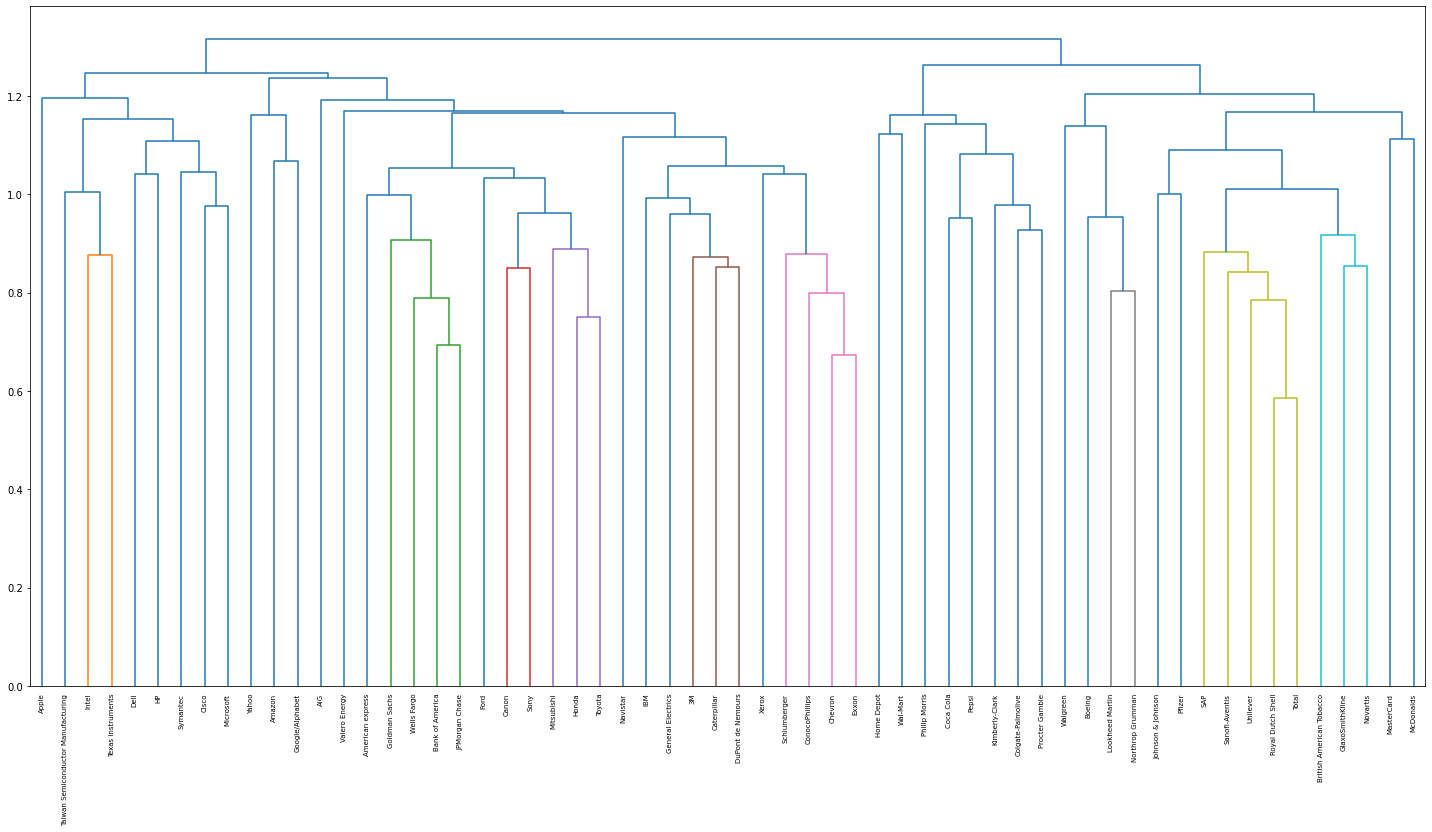

In [104]:
# set the fig size
fig= plt.figure(figsize=(25,12.5))

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=7
            )

plt.show()

Agora precisamos extrair os clusters para fazer as nossas recomendações.
Para isso, precisamos estabelecer o limite de corte da nossa árvore. Na parte de baixo temos todas as empresas ou folhas. Se fizermos um corte em 0.5 por exemplo, teremos 60 clusters. Um para cada empresa. Se fizermos acima de 1.4 teremos apenas um grande cluster com as 60 empresas. Precisamos estabelecer um corte que otimize e capture o que estamos buscando (a covariância dos ativos).

In [105]:
# fazendos as importações necessárias
from scipy.cluster.hierarchy import fcluster

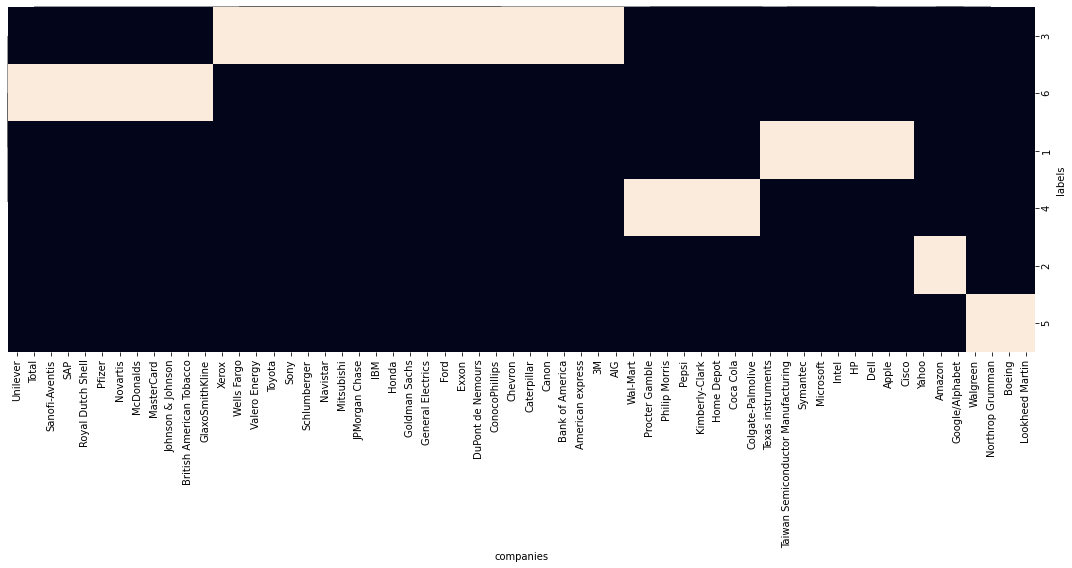

In [119]:
# Escolhendo o ponto de corte da nossa árvore do dendrograma
# Faça uma alteração nesse valor mudam os clusters

labels = fcluster(mergings,1.2, criterion='distance' )

# criando um dataframe com as labes e as empresas= df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Criando uma crosstab: ct
ct = pd.crosstab(df['labels'], df['companies'])

# transformando a crosstab em um cluster map
sns.clustermap(ct, figsize=(15, 8), cbar_pos=None, dendrogram_ratio=0.001)

E o melhor de tudo, já temos um dataframe com a label de cada cluster e o nome de todas as empresas…

!!! Importante a parte mais clara que marca em conjunto com eixo y quem pertence a qual grupo!

In [120]:
df['labels'].max()

6

In [121]:
df['labels'].value_counts()

3    24
6    12
1     9
4     8
5     4
2     3
Name: labels, dtype: int64

## Desafio: Crie um nome para cada label que ajude aos investidores a identificar quais empresas estão em um determinado cluster.

In [123]:
cluster_report(features, clustering_result)

NameError: name 'cluster_report' is not defined

# Conclusão

Que bom que você chegou até aqui!
Chegamos ao fim dos estudos básicos de algoritmos não-supervisionados. Durante essa jornada, passamos pelos principais tipos de algoritmos de clusterização passando por exemplos dos mais conhecidos e no final, podemos ver o KMeans e o Cluster Hierárquico em uma aplicação de datasets reais. Estas novas habilidades são fundamentais para a caixa de ferramenta de profissionais de ciência de dados.
Com este texto e o de Redução de dimensionalidade, finalizamos o bloco de aprendizado não supervisionado. Como sempre, esperamos que tenha ficado claro cada parte dos nossos textos, mas se a qualquer momento surgir uma dúvida, lembre-se, tem sempre alguém do time Tera pronto para te ajudar!